In [ ]:
!pip install config

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scst
import scipy.optimize as scop
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
png = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pinguins.csv')
# png.fillna(value=0, inplace=True)
print(png)
# png_1 = pd.DataFrame(png)
# print(png_1)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0  

In [ ]:
pgns = png.dropna()
print(pgns)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0  

In [11]:
#men is 0, woman is 1
pgns['sex'] = pgns['sex'].replace({'male': 0 , 'female': 1})
pgns.drop('species', axis= 1 , inplace= True )
pgns.drop('island', axis=1, inplace=True )

<ipython-input-11-1d0520e3373c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pgns['sex'] = pgns['sex'].replace({'male': 0 , 'female': 1})
<ipython-input-11-1d0520e3373c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pgns.drop('species', axis= 1 , inplace= True )
<ipython-input-11-1d0520e3373c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pgns.drop('island', axis=1, inp

In [12]:
pgns

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,39.1,18.7,181.0,3750.0,0,2007
1,39.5,17.4,186.0,3800.0,1,2007
2,40.3,18.0,195.0,3250.0,1,2007
4,36.7,19.3,193.0,3450.0,1,2007
5,39.3,20.6,190.0,3650.0,0,2007
...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,0,2009
340,43.5,18.1,202.0,3400.0,1,2009
341,49.6,18.2,193.0,3775.0,0,2009
342,50.8,19.0,210.0,4100.0,0,2009


In [13]:
pgns.to_csv('penguins.csv', index = False)

In [14]:
peng = pd.read_csv('/content/penguins.csv')
peng

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,39.1,18.7,181.0,3750.0,0,2007
1,39.5,17.4,186.0,3800.0,1,2007
2,40.3,18.0,195.0,3250.0,1,2007
3,36.7,19.3,193.0,3450.0,1,2007
4,39.3,20.6,190.0,3650.0,0,2007
...,...,...,...,...,...,...
328,55.8,19.8,207.0,4000.0,0,2009
329,43.5,18.1,202.0,3400.0,1,2009
330,49.6,18.2,193.0,3775.0,0,2009
331,50.8,19.0,210.0,4100.0,0,2009


In [15]:
read = '/content/penguins.csv'

<ipython-input-16-62cdbcc249a9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x ='sex', y = 'body_mass_g' , data=peng , palette = 'pink')


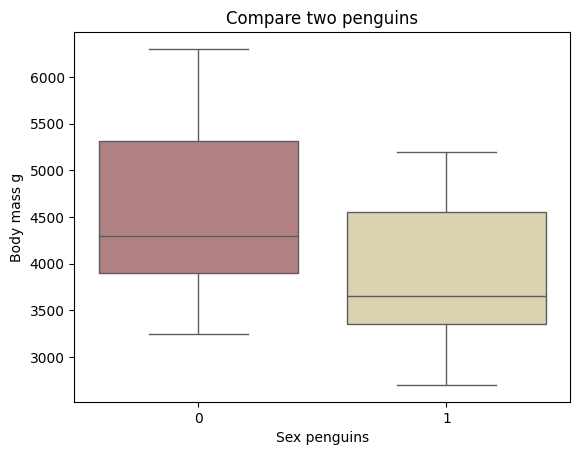

In [16]:
# Построим график и заметим, что девочки весят меньше мальчиков
X = peng['sex']
Y = peng['body_mass_g']

sns.boxplot(x ='sex', y = 'body_mass_g' , data=peng , palette = 'pink')

plt.xlabel('Sex penguins')
plt.ylabel('Body mass g')
plt.title('Compare two penguins')
plt.show()

In [17]:
#Строим линейную регрессию И ДА МЫ ВОСПОЛЬЗУЕМСЯ ГОТОВОЙ БИБЛИОТЕКОЙ
X = peng['bill_length_mm'].values.reshape(-1,1)
y = peng['flipper_length_mm'].values
model = LinearRegression()
model.fit(X, y)

predict_y = model.predict(X)

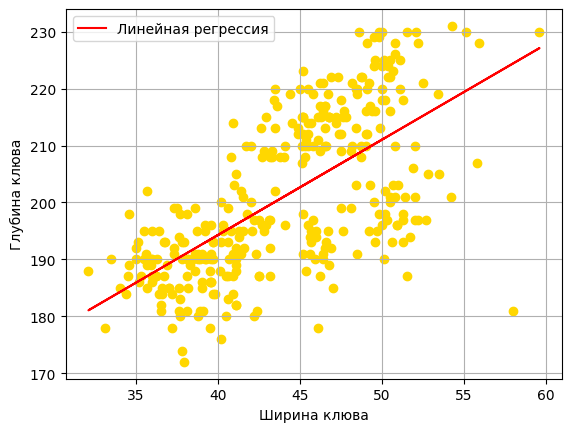

In [18]:
plt.scatter(X, y, color='gold')
plt.plot(X, predict_y, color = 'red', label = 'Линейная регрессия' )
plt.legend()
plt.grid()
plt.xlabel('Ширина клюва')
plt.ylabel('Глубина клюва')
plt.show()

### Проверим данные на нормальность распределения по тесту Шапиро-Уилка, если значения отклоняются от 0,5 в меньшую сторону, то надо проверять на ненормальность распределения

In [19]:
with open(read, 'r' ) as INPUT:
  header = INPUT.readline().strip().split(',')
  data = [np.array([], dtype=float) for i in header]
  for Rows in INPUT:
    Rows = Rows.strip().split(',')
    for i in range(len(Rows)):
      data[i] = np.append(data[i], float(Rows[i]))

### Логорифмируем данные, чтобы сделать данные более симметричнми

In [37]:
data[1] = np.log(data[1])
data[2] = np.log(data[2])
print("/n bill_length_mm: ", data[1])
print('/n bill_depth_mm: ', data[2] )

/n bill_length_mm:  [1.07449838 1.04958667 1.06138513 1.08522477 1.10700731 1.05751194
 1.09042203 1.05357967 1.11645259 1.11490321 1.05751194 1.0799183
 1.10860674 1.06896054 1.12104314 1.06708759 1.07449838 1.08346829
 1.06330007 1.04553122 1.07812448 1.07266576 1.05945582 1.07266576
 1.07812448 1.03510744 1.06330007 1.05751194 1.07812448 1.04141152
 1.11490321 1.0971887  1.07081988 1.08522477 1.08169952 1.06138513
 1.06896054 1.07081988 1.09213087 1.03932701 1.0763179  1.0799183
 1.05945582 1.11645259 1.05555329 1.07812448 1.05945582 1.08870149
 1.06330007 1.07266576 1.05159087 1.0763179  1.0329719  1.08169952
 1.03932701 1.11490321 1.04141152 1.06520082 1.04347951 1.06138513
 1.02425191 1.08169952 1.0329719  1.08696912 1.0799183  1.06896054
 1.04553122 1.07812448 1.05159087 1.07081988 1.03722573 1.08696912
 1.02202612 1.08169952 1.04553122 1.05357967 1.0763179  1.08696912
 1.05751194 1.10214633 1.08870149 1.07266576 1.08346829 1.0763179
 1.06138513 1.06330007 1.04347951 1.06330007 

In [38]:
def Normality_checker(List_of_values, alpha=0.05):
    n = len(List_of_values)
    Checker_vector = []
    for i in range(n):
        if 1-scst.shapiro(List_of_values[1]).statistic < alpha:
            Checker_vector.append(True)
        else:
            Checker_vector.append(False)
    return Checker_vector

In [39]:
print(header)
print(Normality_checker(data, alpha=0.13))


['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']
[True, True, True, True, True, True]


In [40]:
print(header[2:])
print(np.corrcoef(data[2:]))

['flipper_length_mm', 'body_mass_g', 'sex', 'year']
[[ 1.00000000e+00  8.67174188e-01 -2.53491159e-01  1.55064092e-01]
 [ 8.67174188e-01  1.00000000e+00 -4.24986991e-01  2.18621307e-02]
 [-2.53491159e-01 -4.24986991e-01  1.00000000e+00  4.66628177e-04]
 [ 1.55064092e-01  2.18621307e-02  4.66628177e-04  1.00000000e+00]]


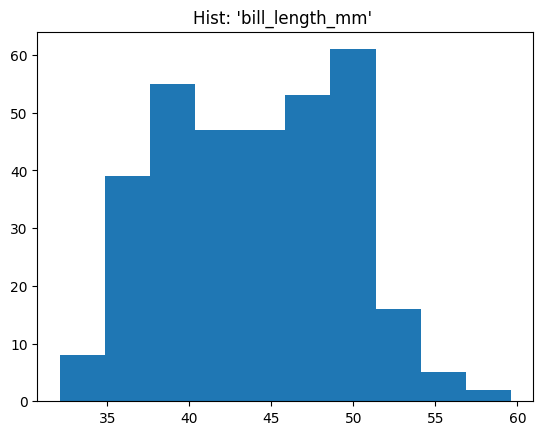

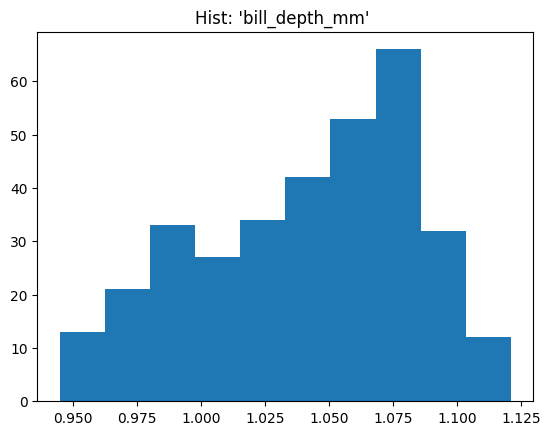

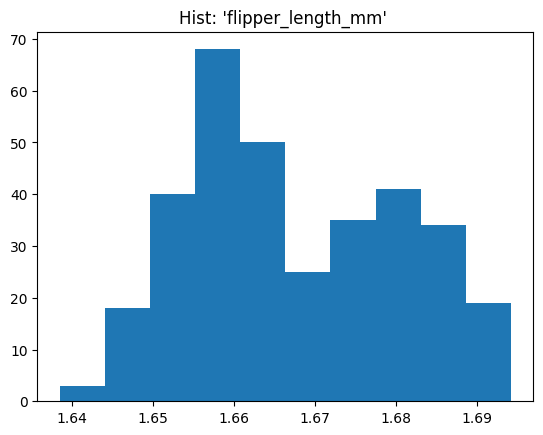

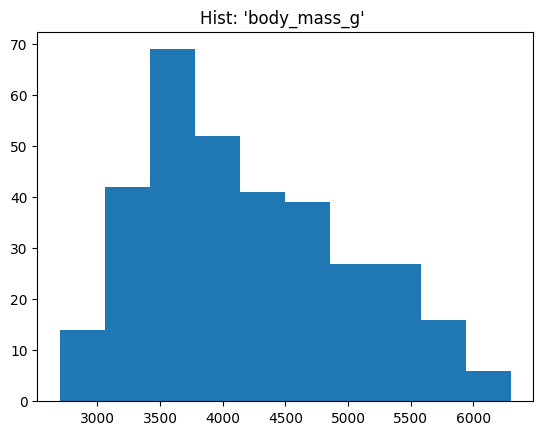

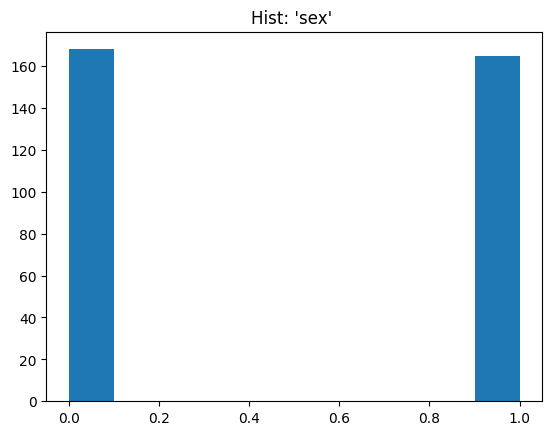

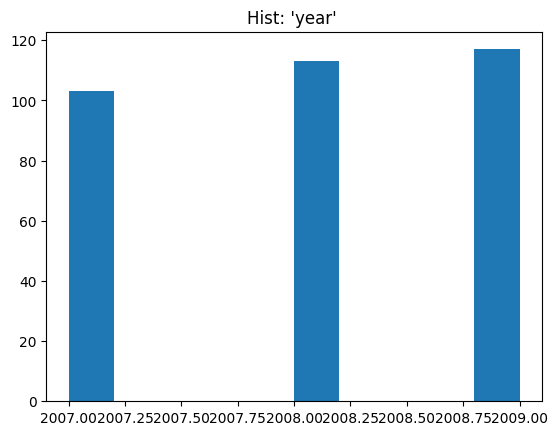

In [41]:
for i in range(len(header)):
  if i == 1 and i == 2:
    plt.title('Hist' + " ln('" + header[i]+ "') " )
  else:
    plt.title("Hist:" + " '" + header[i]+ "' ")
  plt.hist(data[i])
  plt.show()

In [42]:
#Вычисляет оюычный коеффициент детерминации
def Determination_coef(Y_vector_exp, Y_vector_fit):
  Mean_np = lambda Y: np.sum(Y)/len(Y)
  Variance_np = lambda Y, y_mean: np.sum(np.power(Y - np.ones(len(Y))*y_mean, 2))
  y_mean_exp = Mean_np(Y_vector_exp)
  return Variance_np(Y_vector_fit, y_mean_exp)/ Variance_np(Y_vector_exp, y_mean_exp)



In [53]:
#Вычисляет скорректированный коэффициент детерминации для регрессии
def Determination_coef_adj(Y_vector_exp, Y_vector_fit, n, k):
  return 1-(1-Determination_coef(Y_vector_exp, Y_vector_fit)*(n-1)/(n-k-1))

In [54]:
#Средняя ошбика аппроксимации(показывает среднее отклонение расчетных значений от фактических)
def Mean_error_of_approximation(Y_vector_exp, Y_vector_fitted):
  n = len(Y_vector_exp)
  if n == len(Y_vector_fitted):
    return np.sum(np.fabs((Y_vector_exp - Y_vector_fitted)/Y_vector_exp))/n
  else:
    print("Mean_error_of_approximation(a1, a2) must have len a1= len a2")

In [55]:
def F_test_on_significance(Y_vector_exp, Y_vector_fit, pars_len= 3,alpha = 0.05):
  n = len(Y_vector_exp) if len(Y_vector_exp) == len(Y_vector_fit) else 0
  try :
    y_mean_exp = np.sum(Y_vector_exp)/n
  except ZeroDivisionError:
    raise("* 'F_test_on_significance' must has a1 == a2 *")
    MSE = np.sum( np.power(Y_vector_exp - Y_vector_fit, 2) ) / (n - pars_len - 1)
    MSR = np.sum( np.power(Y_vector_fit - np.ones(n) * y_mean_exp, 2) ) / pars_len
    F_value = MSR / MSE
    F_value_critical = scst.f.ppf(q = 1 - alpha, dfn= pars_len, dfd= n - pars_len - 1)
    if F_value > F_value_critical :
        return str(round(F_value, 2)) + " " + str(round(F_value_critical, 2)) + " H0 - sucsess!"
    else:
        return str(round(F_value, 2)) + " " + str(round(F_value_critical, 2)) + " H1 - sucsess!"



In [56]:
def Mean_square_func(V_variavle, V_fixed):
    N = len(V_variavle) if len(V_variavle) == len(V_fixed) else 0
    try:
        S_square = np.sum(np.power(np.abs(V_variavle- V_fixed),2)) / (N-1)
    except ZeroDivisionError:
        if N == "0":
            raise("Mean_square_func - must have arg with equal lens!")
        else:
            raise("Mean_square_func - arg must be great then 1!")
    else:
        return S_square


In [57]:
def Linear_regration_Multi_dimensional(DATA, Pars):
    n_dim = len(DATA)
    n_objects = len(DATA[0])
    if len(Pars) == n_dim + 1:
        Y = np.ones(n_objects)*Pars[0]
        for i in range(n_dim):
            Y = Y + Pars[i+1] * DATA[i]
        return Y # X_values is a numpy object; numpy vectors is returned
    else:
        raise("* With 'Pars' troubles! *")

Target_func = lambda Pars: Mean_square_func(Linear_regration_Multi_dimensional([data[2]], Pars), data[-1])
# len(Pars_init) == n_dim + 1 ! (2)
Pars_init = [1, 1]
res = scop.minimize(Target_func, Pars_init, method='SLSQP', options={'eps':1e-5, 'ftol':1e-8, 'disp': True, 'maxiter':90})
print(res)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6449872074275727
            Iterations: 9
            Function evaluations: 28
            Gradient evaluations: 9
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.6449872074275727
       x: [ 1.992e+03  9.648e+00]
     nit: 9
     jac: [ 4.305e-08  9.511e-08]
    nfev: 28
    njev: 9


A_mean :  0.0003389876999755496
R2 adj :  0.024026561715248196


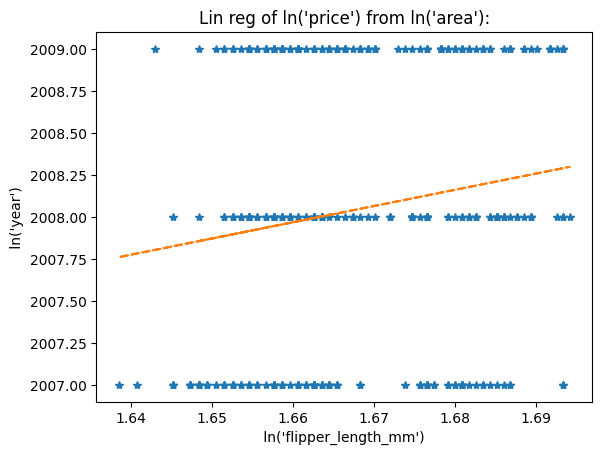

In [58]:
Y_model = Linear_regration_Multi_dimensional([data[2]], res.x)
print("A_mean : ", Mean_error_of_approximation(data[-1], Y_model))
print("R2 adj : ", Determination_coef_adj(data[-1], Y_model, len(Y_model), len(res.x)))

plt.title("Lin reg of ln('price') from ln('area'):")
plt.ylabel(" ln('" + header[-1]+ "') ")
plt.xlabel(" ln('" + header[2]+ "') ")
plt.plot(data[2], data[-1] , "*", data[2], Y_model , "--")
plt.show()
